# Классификация текстов с использованием Наивного Байесовского Классификатора

## Задание 1 (1 балл)

Откройте данные. Узнайте, сколько в них спам- и не спам-писем. Визуализируйте полученные соотношение подходящим образом.

In [162]:
import pandas as pd
import numpy as np
from sklearn import naive_bayes
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
sns.set_style('darkgrid')
import matplotlib.pyplot as plt


In [163]:
df = pd.read_csv("data/spam_or_not_spam.csv")
df.head()

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [164]:
df['label'].value_counts()

label
0    2500
1     500
Name: count, dtype: int64

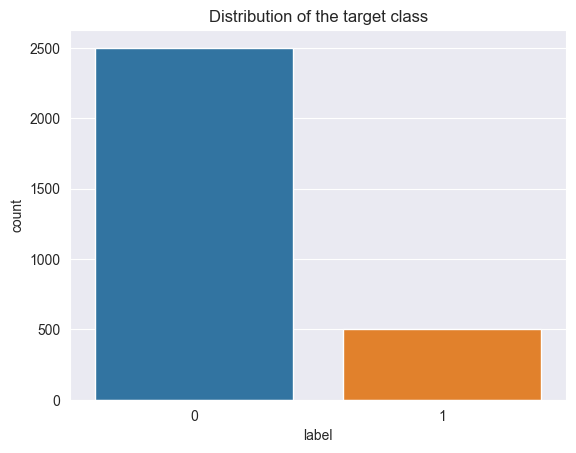

In [165]:
sns.countplot(df, x='label').set(title='Distribution of the target class');

## Задание 2 (2 балла)

Вам необходимо предобработать ваши данные и перевести их в векторный вид. Подгрузим необходимый модуль:

In [166]:
from sklearn.feature_extraction.text import CountVectorizer

Замените в данных все пустые строки и строки, состоящие из пробелов, на пропуски (NaN). После этого удалите из данных все строки, в которых наблюдаются пропущенные значения.

In [167]:
df[df['email'] == " "]

,email,label
2806,,1
2828,,1


In [168]:
def bad_rows(row: str):
    if row is np.NaN or not row or not row.replace(" ", ""):
        return np.NaN
    return row
df['email'] = df['email'].apply(bad_rows)
df.dropna(axis=0, how='any', inplace=True)
df.reset_index(drop=True, inplace=True)
df['email'].isna().sum()

0

Переводим данные в векторный вид:

In [169]:
vectorizer = CountVectorizer()  
X = vectorizer.fit_transform(df["email"])

Определите, сколько теперь признаков в нашем наборе данных:

In [170]:
print(f"Words amount: { X.shape[1]}")

Words amount: 34116


## Задание 3 (2 балла)

Определите целевую переменную и признаки:

In [171]:
y = df['label']

Разделите выборку на обучающую и тестовую, используя стратифицированное разбиение (параметр `stratify` установите в значение вектора ответов y) размер тестовой выборки (`test_size`) возьмите как 0.25, параметр `random_state` определите со значением 42:

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, stratify=y, random_state=42)

Рассчитайте среднее значение целевой переменной по тестовой выборке:

In [173]:
print(f"Target mean on train set {y_train.mean():.3f}")
print(f"Target mean on test set {y_test.mean():.3f}")

Target mean on train set 0.166
Target mean on test set 0.165


## Задание 4 (3 балла)

Определите и обучите подходящий алгоритм с параметром alpha = 0.01

In [174]:
cnb = naive_bayes.ComplementNB(alpha=0.01)
cnb.fit(X_train, y_train)
cnb_preds = cnb.predict(X_test)

Оцените результат с точки зрения всех известных вам метрик (не менее трёх):

In [175]:
print(f"precision score {metrics.precision_score(y_test, cnb_preds)}")
print(f"f1-score {metrics.f1_score(y_test, cnb_preds):.3f}") 
print(f"balanced accuracy score {metrics.balanced_accuracy_score(y_test, cnb_preds):.3f}")

precision score 1.0
f1-score 0.962
balanced accuracy score 0.964


Нарисуйте ROC-кривую:

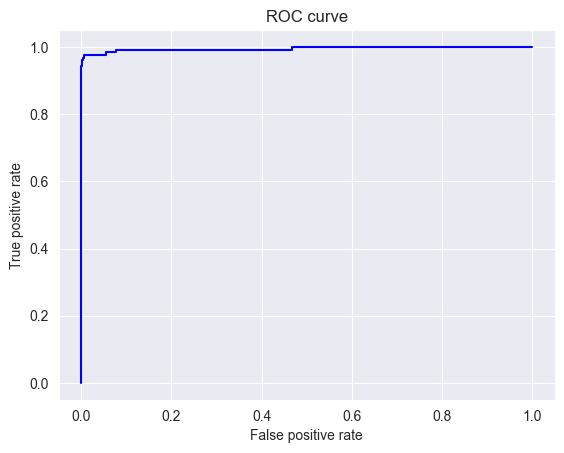

In [176]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, cnb.predict_proba(X_test)[:,1])
ax = plt.axes()
ax.plot(fpr,tpr, label="ROC Curve",color="blue") 
ax.set(title='ROC curve', xlabel='False positive rate', ylabel='True positive rate');


c:\Users\mblyz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


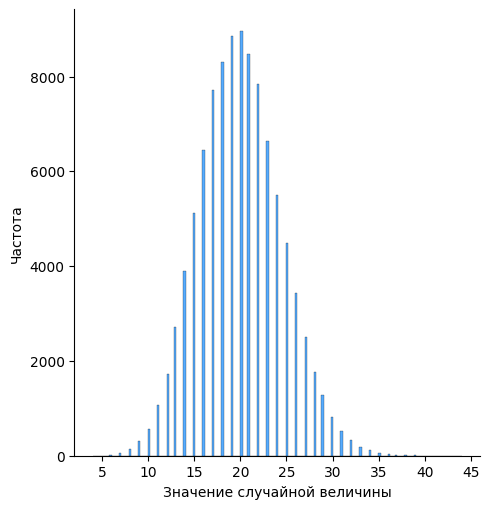

## Задание 5 (3 балла)

Переберите несколько значений alpha с помощью кросс-валидации. Оцените, зависит ли от этого параметра качество классификации.

In [161]:
from sklearn.model_selection import GridSearchCV
alpha_list = np.linspace(0.01, 1, 50)
gcv = GridSearchCV(param_grid={'alpha': alpha_list},
                   estimator=naive_bayes.ComplementNB(),
                   scoring='balanced_accuracy')
gcv.fit(X_train, y_train)
print(f"Best alpha: {gcv.best_params_}; best balanced_accuracy {gcv.best_score_}")

Best alpha: {'alpha': 0.3130612244897959}; best balanced_accuracy 0.9839279279279278


Удалось поднять значение сбалансированной accuracy на 0.02, так что в целом, влияение альфа не так ощутимо